# COMP1008 2023/24 Coursework - Prediction with Machine Learning

#### Student Name: Seiji Sato
#### Student ID: 20607456

## Task description

<b>Main task</b>: Choose <b>one</b> of the following datasets. Build a linear regression model and another machine learning model of your choice to conduct predictions on future new unseen data. Use approporate methods in pandas, matplotlib and sklearn libraries to analyse and process your dataset for building models for your chosen prediction task.
- Movies_Ratings: predict movie ratings
- Shared_Bike_Demand: predict bike sharing demand
- Forest_Fires_Area: predict areas of forest fires
- Obesity_Level: predict level of obesity

<b>Format</b>: Use this Jupyter Notebook file as a template to write your report in `Markdown` cells, supported by your appropriate source codes in `Code` cells which produce the corresponding plots or results answering the questions. Rename this .ipynb file `202324COMP1008cw-XXX.ipynb`, where XXX is your username (e.g. psxyz), and submit it to Moodle by <b><font color = "red">22 March, 3pm</font></b>.

<b>Marks</b>: In total 100 marks (count for 25% in COMP1008), awarded on the basis of understanding on machine learning theories, how informative and well presented your code, visualisations and results are (e.g. comment for code, necessary labels in plots), self-learning ability solving the specific problem, and succinct report writing.

Please check the detailed instructions at the end of this template file.

<div class="alert alert-success" style="text-align:left;">
<h2>Question 1. Prediction Model 1 - Linear Regression Model<span style="float:right;">[50 marks]</span></h2></div>

#### Question 1a <span style="color:red">(5 marks)</span> 
Briefly explain the characteristics of the dataset that make it suitable for regression analysis. Your justification should demonstrate your understanding of the linear regression model.

<b>Q1a Answer</b>: Your answer here

There are many things a dataset has to have to be suitable for a linear regression model:

- Data should have a linear correlation: if there is no linear correlation between the features and label then regression would not be a suitable model for this specific task.

- No outliers: Preferably there should not be outliers as these greally affect the regression line, an outlier sample would greatly divert the path of the line outlined by the model.

- Null values should be handled: As with any other machine learning model, the importance of handling null values still holds for a regression model.

- One-hot encoding: For categorical features with more than 2 possible values, it might be useful to apply one-hot encoding so the correlation between each of the values within that feature affects the label.

- Scaling: Depending on how data is structured, scaling features that are greatly larger or smaller than the others might be useful to avoid biases in the model.

In [181]:
# Your code here. Add more cells as you need.
# import approporate libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

#### Question 1b <span style="color:red">(15 marks)</span>
Use approporate methods in pandas and/or matplotlib libraries to analyse your dataset. Are there issues you observe in which part(s) of the data? What would happen if the data is not pre-processed properly?

<b>Q1b answer</b>: Your answer here

### First read data

In [182]:
# Your code here
data = pd.read_csv("Forest_Fires_Area.csv")

In [183]:
data.head()

,coordinate_x,coordinate_y,month,day,moisture_shade,moisture_litter,soil_dryness,spread_rate,temperature,humidity,wind(kmh),rain(mm),area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51.0,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33.0,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33.0,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97.0,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99.0,1.8,0.0,0.0


We can see that day an month are categorical and non numerical, we could one-hot encode them

### We display histograms to get a better understanding of the data and if it hasa outliers

<function matplotlib.pyplot.show(close=None, block=None)>

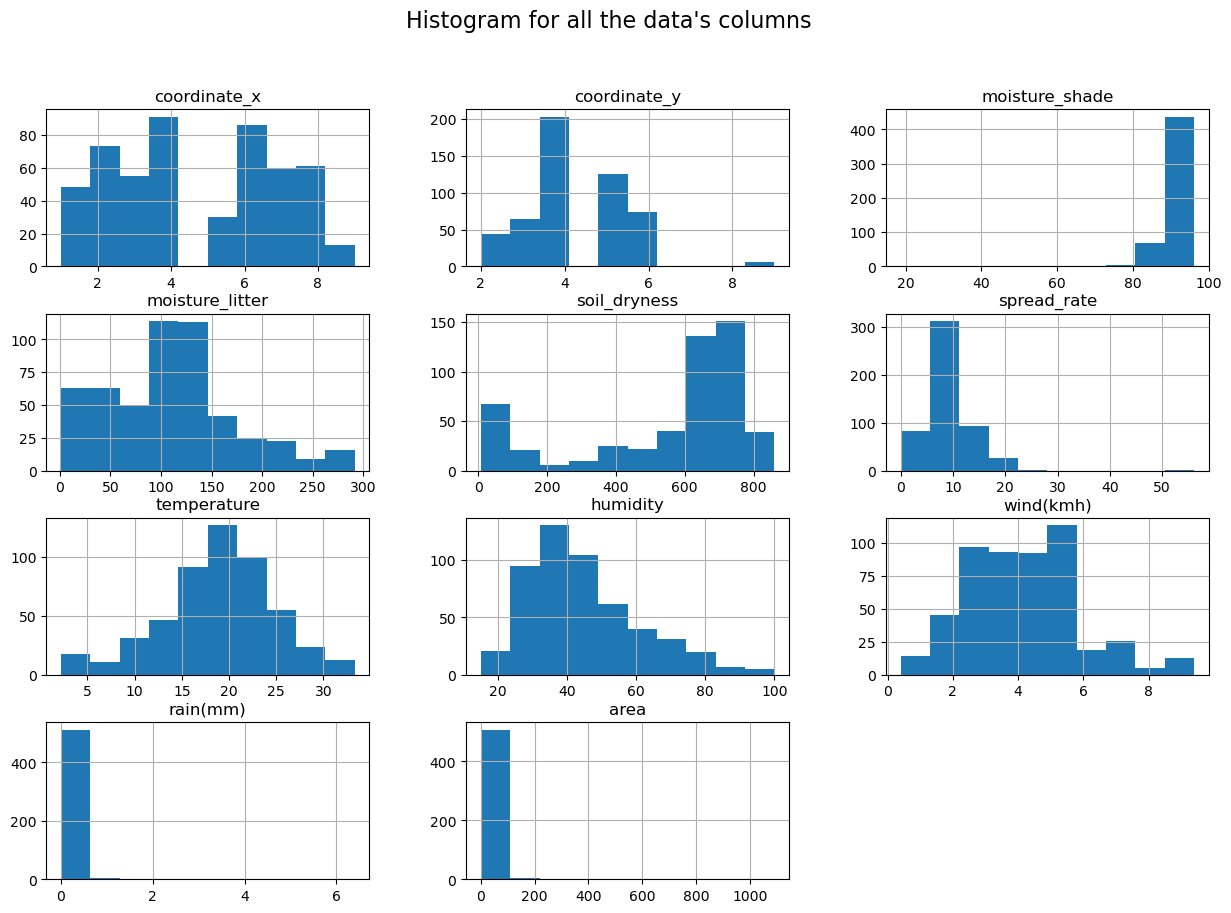

In [184]:
data.hist(figsize=(15,10))
plt.suptitle("Histogram for all the data's columns",fontsize=16)
plt.show

### From the histograms we can see that moisture shade, spread rate, rain and area have outlier values, we boxplot them to confirm this

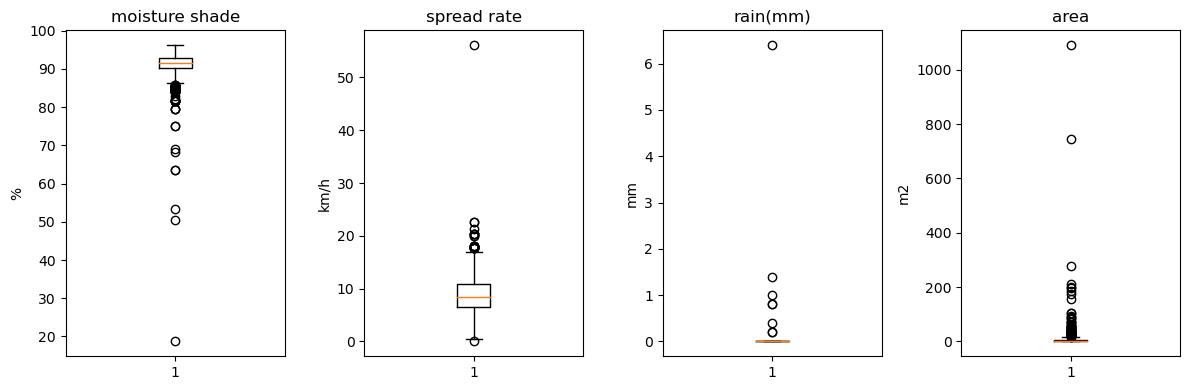

In [185]:
# Create a figure and axis objects
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))

# Plotting boxplots on each axis
axes[0].boxplot(data["moisture_shade"])
axes[0].set_title('moisture shade')
axes[0].set_ylabel('%')

axes[1].boxplot(data["spread_rate"])
axes[1].set_title('spread rate')
axes[1].set_ylabel('km/h')

axes[2].boxplot(data["rain(mm)"])
axes[2].set_title('rain(mm)')
axes[2].set_ylabel('mm')

axes[3].boxplot(data["area"])
axes[3].set_title('area')
axes[3].set_ylabel('m2')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

### Here we can see if the outliers have any effect on the area

we can clearly see the oultliers have littlle to no correlation with the area of the fire

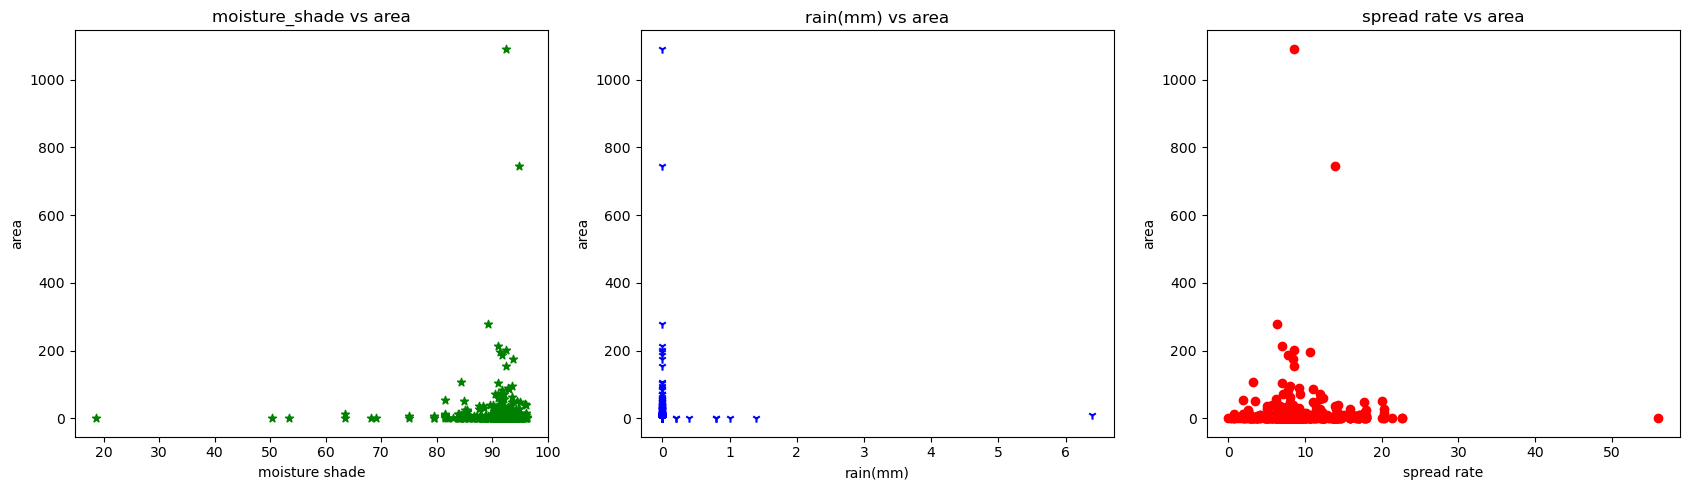

In [186]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17, 5))

ax1.set_title("moisture_shade vs area")
ax1.scatter(data["moisture_shade"], data["area"], c="green", marker="*")
ax1.set_xlabel("moisture shade")
ax1.set_ylabel("area")

ax2.set_title("rain(mm) vs area")
ax2.scatter(data["rain(mm)"], data["area"], c="blue", marker="1")
ax2.set_xlabel("rain(mm)")
ax2.set_ylabel("area")

ax3.set_title("spread rate vs area")
ax3.scatter(data["spread_rate"], data["area"], c="red")
ax3.set_xlabel("spread rate")
ax3.set_ylabel("area")

plt.tight_layout()
plt.show()



### We also check if there are any null values

In [187]:
data.isnull().sum()

coordinate_x       0
coordinate_y       0
month              0
day                4
moisture_shade     0
moisture_litter    0
soil_dryness       0
spread_rate        0
temperature        0
humidity           2
wind(kmh)          0
rain(mm)           0
area               0
dtype: int64

#### Question 1c <span style="color:red">(20 marks)</span>
Use approporate methods to address the issues identified in <b>Q1a</b>.</span> Brielfy explain the methods and their parameters you used to address the issues.<br>

<b>Q1c answer</b>: 

### First lets address the null values


In [188]:
# Your code here

#Fill day null values by the most common day
data["day"] = data["day"].fillna(data["day"].mode().iloc[0])

#Fill the humidity null values by the average humidity for the respective temperature
aver_hum = data.groupby(["temperature"])["humidity"].mean()
data["humidity"] = data["humidity"].fillna(data["temperature"].map(aver_hum))

### Then lets address outliers
We should take into account that although some of these "outlier" data samples might be accurate measurements, they could greatly affect the performance of our machine learning algorithm

In [189]:
#Replace the outiler for "spread rate" with the mean
sr_idx = data["spread_rate"].idxmax()
data.loc[sr_idx,"spread_rate"] = data["spread_rate"].mean()

#Replace the outliers for "mosture shade" with the mean
ms_idx = data["moisture_shade"].idxmin()
data.loc[ms_idx,"moisture_shade"] = data["moisture_shade"].mean()

#Replace outlier in rain(mm) with the average rainfall
r_idx = data["rain(mm)"].idxmax()
data.loc[r_idx,"rain(mm)"] = data["rain(mm)"].mean()

#Address the outliers in the area column as well (twice for the max)
ar_idx = data["area"].idxmax()
data.loc[ar_idx,"area"] = data["area"].mean()

ar_idx = data["area"].idxmax()
data.loc[ar_idx,"area"] = data["area"].mean()

<function matplotlib.pyplot.show(close=None, block=None)>

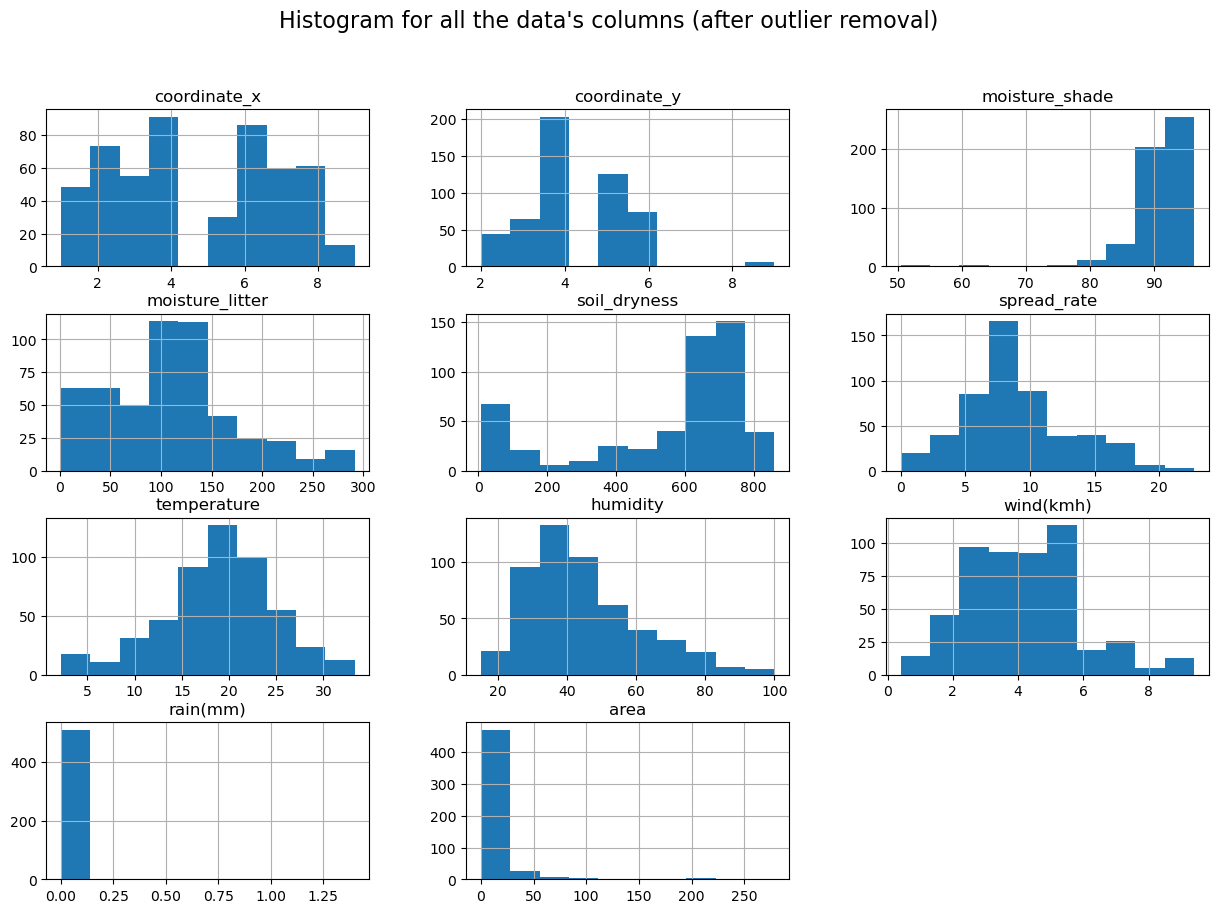

In [190]:
data.hist(figsize=(15,10))
plt.suptitle("Histogram for all the data's columns (after outlier removal)",fontsize=16)
plt.show

#### Here we see that the rain(mm) feature is still heavily skewed, however this is okay due to the nature of the data, however the area (what we are testing) is still heavily skewed, we will apply a log function to this

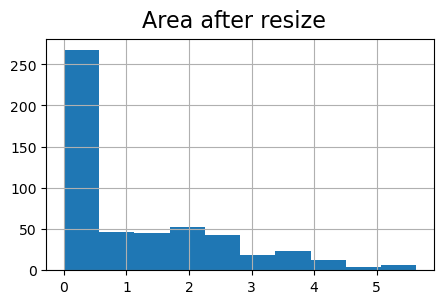

In [191]:
#Apply log function to the area 
data["area"] = np.log(data["area"] + 1)
data["area"].hist(figsize=(5,3))
plt.suptitle("Area after resize",fontsize=16)
plt.show()

### Perform one-hot encoding for the months and days

In [192]:
data = pd.get_dummies(data,columns=["month","day"])

#### Question 1d <span style="color:red">(10 marks)</span>
Build and train a linear regression model. Print its weights and accuracy. Which is the most important feature and how to interpret its contribution to your prediction?

<b>Q1d answer</b>: 

In [193]:
# Your code here
from sklearn.model_selection import train_test_split
from sklearn import metrics

#Split the data into input and output
X = data.drop(columns=["area"])
y = data["area"]

#Split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=3)

lr = LinearRegression()

#Train the regression model
lr.fit(X_train,y_train)

#Predict based on test input
y_pred = lr.predict(X_test)

#Print the MSE
print("Mean Squared Error :",metrics.mean_squared_error(y_test, y_pred))
print()

#List of the weights of each of the features
coefficients_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': lr.coef_})
print(coefficients_df)
print()

#Intercept 
print("Intercept: ",lr.intercept_)

Mean Squared Error : 1.835242024192253

            Feature   Coefficient
0      coordinate_x  7.761520e-03
1      coordinate_y  1.608508e-02
2    moisture_shade  9.984218e-03
3   moisture_litter  3.239579e-03
4      soil_dryness -1.226063e-03
5       spread_rate -1.644418e-02
6       temperature  5.845616e-02
7          humidity  9.537993e-03
8         wind(kmh)  6.957131e-02
9          rain(mm) -8.114559e-01
10        month_apr -4.113524e-01
11        month_aug -2.097563e-01
12        month_dec  2.036112e+00
13        month_feb  5.394095e-02
14        month_jan -8.205071e-01
15        month_jul -3.408250e-01
16        month_jun -5.982639e-01
17        month_mar -4.269758e-01
18        month_may  4.440892e-16
19        month_nov  3.330669e-16
20        month_oct  2.189562e-01
21        month_sep  4.986713e-01
22          day_fri -1.274347e-01
23          day_mon  4.130028e-02
24          day_sat  4.529854e-03
25          day_sun -6.982480e-02
26          day_thu -1.642085e-01
27      

By listing the weights of each feature, we can see that the most determining features for the area of a wildfire are the month of september, humidity and its coordinates with respect to X.

### Now we will compare that with other data splits using K-fold cross-validation

We can see that there is a big difference depending on which data split we chose, because the range of values in the data is very big, its very difficut to accurately predict the area of wildfires without compromising overfitting in the case of a linear regression model

In [194]:
from sklearn.model_selection import cross_val_score
print("Cross-val scores:",cross_val_score(lr, X , y, cv=5, scoring='neg_mean_squared_error',error_score="raise")*-1)
print("Mean of cross-val scores: ",cross_val_score(lr, X , y, cv=5, scoring='neg_mean_squared_error',error_score="raise").mean()*-1)

Cross-val scores: [2.58574281 1.02227605 4.53183491 1.83131374 2.53832858]
Mean of cross-val scores:  2.5018992171670864


<div class="alert alert-success" style="text-align:left;"><h2>Question 2. Prediction Model 2<span style="float:right;">[20 marks]</span></h2></div>

#### Question 2a <span style="color:red">(10 marks)</span>
For the same dataset, build a different machine learning model for your prediction task.<br>
Which model did you choose and why? What are the parameters of your Prediction Model 2?</span>

For this we would use a neural network model, because it is capable of handling more complex non linear relationships and can handle a more raw input were its performance doesn't have to worry alot about the data pre processing

<b>Q2a answer</b>: 

In [195]:
# Your code here
#Training and predicting with tree model
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(hidden_layer_sizes=(30,31), max_iter=20000, random_state=3)
mlp.fit(X_train, y_train)
predict_nn = mlp.predict(X_test)

In the above code we can see that I chose the layer sizes to be 30,24 , this was chosen after testing different settings and coming into the conclusion that this one gave the best results.

#### Question 2b <span style="color:red">(10 marks)</span>
Evaluate the model you built. Explain if this model is better or worse than Prediction Model 1, and in which way.

<b>Q2b answer</b>: 

In [196]:
# Your code here
print("Mean Squared Error :",metrics.mean_squared_error(y_test,predict_nn))
print("Cross-val scores:",cross_val_score(mlp, X , y, cv=5, scoring='neg_mean_squared_error',error_score="raise")*-1)
print("Mean of cross-val scores: ",cross_val_score(mlp, X , y, cv=5, scoring='neg_mean_squared_error',error_score="raise").mean()*-1)

Mean Squared Error : 1.917801345934887
Cross-val scores: [2.15891605 1.26396816 4.05607017 2.3254677  3.1976883 ]
Mean of cross-val scores:  2.6004220775107063


Here we can see the benchmarks of performance of the neural network model, as we can see it had a better performance in the sense that it didn't have a big gap of values of MSE, however upon further testing of the model, it was observed that tuning the size of the neural network significanlly affected the performance of the model with respects to the data, and with some parameters it actually gave worst scores and a bigger gap between them in cross-validation.

<div class="alert alert-success" style="text-align:left;"><h2>Question 3. Comparison and Improvement<span style="float:right;">[30 marks]</span></h2></div>

#### Question 3a <span style="color:red">(15 marks)</span>
Based on your Prediction Model 1, remove the least important feature and evaluate the performance of the linear regression model. In which way the feature removal impacts the model performance?

<b>Q3a answer</b>:

First lets observe the correlataion each feature has with the "area" through a heatmap

<Axes: >

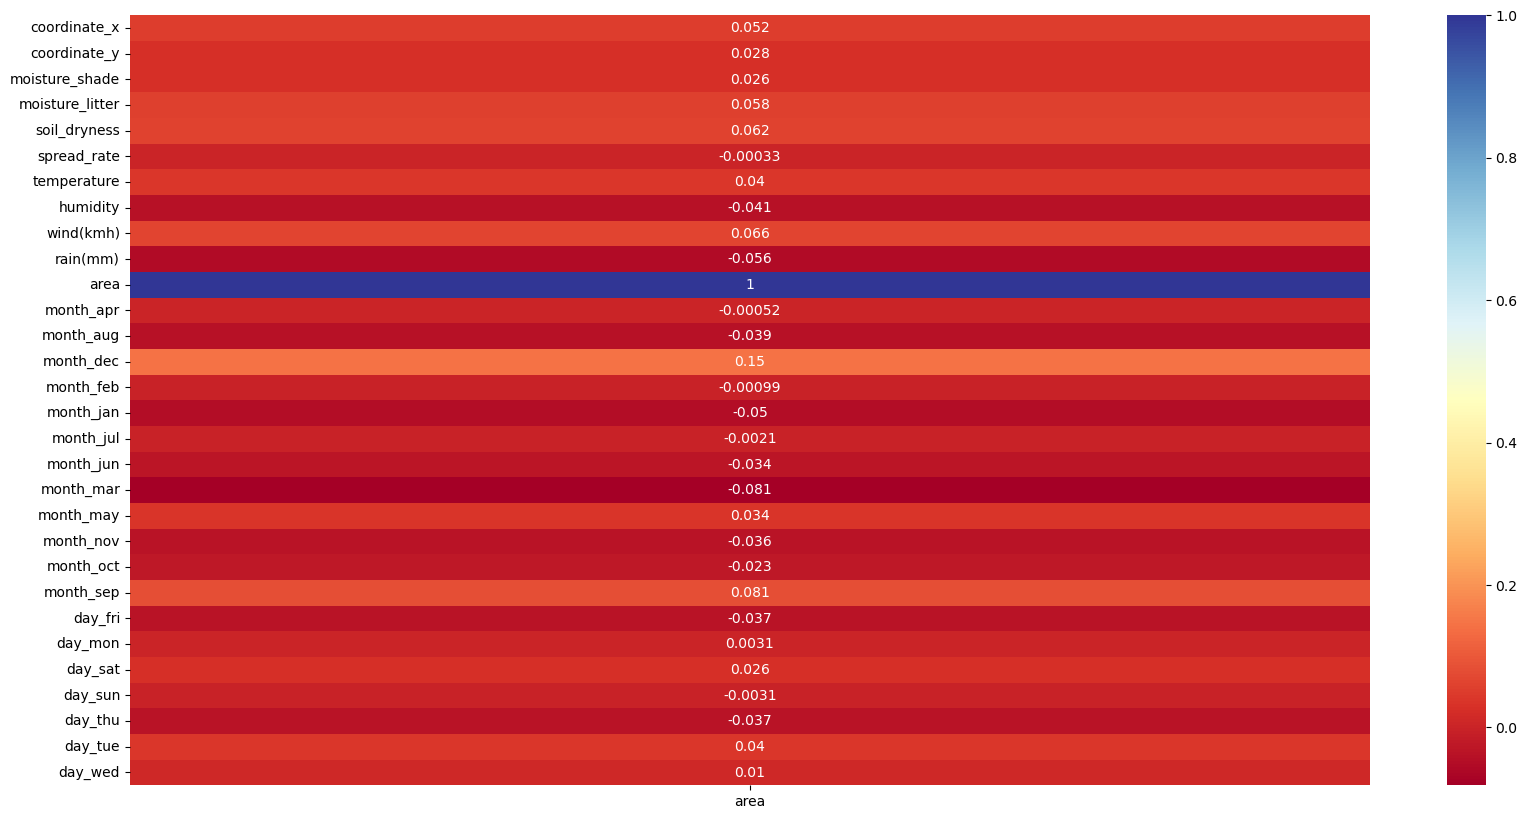

In [197]:
# Your code here
import seaborn as sns
correlation_matrix = data.corr()
area_correlation = correlation_matrix[['area']]
plt.figure(figsize=(20,10))
sns.heatmap(area_correlation,annot=True,cmap="RdYlBu")

We can see that there are alot of features htat have little to no correlation, lets remove them and see the updated heatmap

<Axes: >

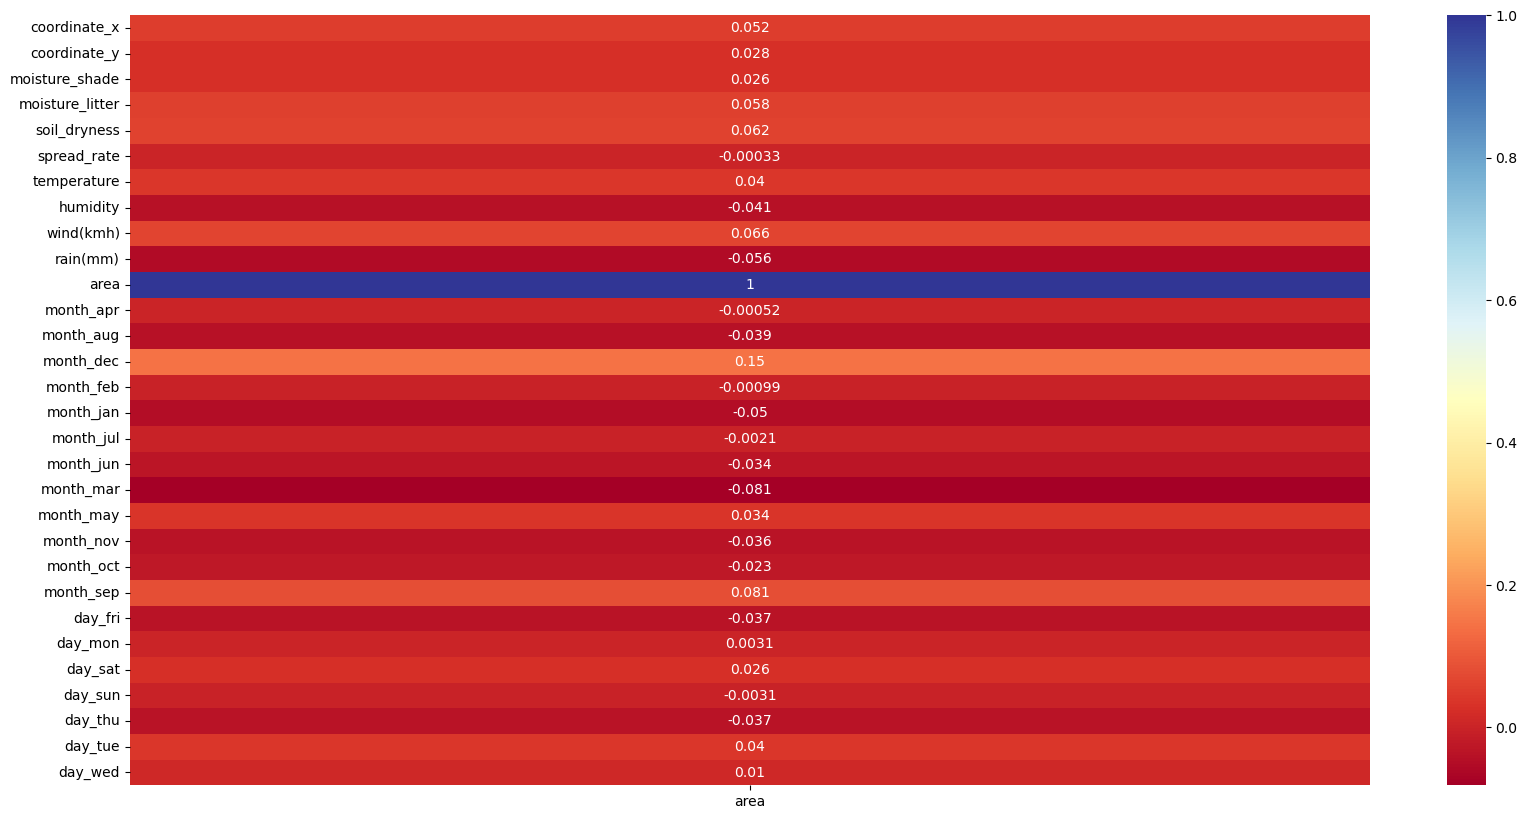

In [198]:
#Get the correlation each feature has with regards to area
#.abs ensures that even if the correlation is negative, its taken into account
correlations = data.corr()["area"].abs()

#Select features which have a higher correlation than 0.01
selected_features = correlations[correlations >= 0.01].index.tolist()

#Set the data to only contain said features
data_filtered = data[selected_features]

#Display heatmap of updated data frame
correlation_matrix = data.corr()
area_correlation = correlation_matrix[['area']]
plt.figure(figsize=(20,10))
sns.heatmap(area_correlation,annot=True,cmap="RdYlBu")

Now that we have just the features that have higher correlation, lets apply the linear regression model again

In [201]:
#Split the data into input and output
X_f = data_filtered.drop(columns=["area"])
y_f = data_filtered["area"]

#Split the data into training and testing data
X_trainf, X_testf, y_trainf, y_testf = train_test_split(X_f,y_f,test_size=0.3,random_state=3)


lr1 = LinearRegression()

#Train the regression model
lr1.fit(X_trainf,y_trainf)

#Predict based on test input
y_predf = lr1.predict(X_testf)

#Print the MSE
print("Mean Squared Error :",metrics.mean_squared_error(y_testf, y_predf))
print()

#List of the weights of each of the features
coefficients_df = pd.DataFrame({'Feature': X_f.columns, 'Coefficient': lr1.coef_})
print(coefficients_df)
print()

#Intercept 
print("Intercept: ",lr1.intercept_)

Mean Squared Error : 1.8230760500661303

            Feature   Coefficient
0      coordinate_x  7.891965e-03
1      coordinate_y  1.472225e-02
2    moisture_shade  4.614717e-04
3   moisture_litter  3.488100e-03
4      soil_dryness -1.535141e-03
5       temperature  5.167208e-02
6          humidity  8.304937e-03
7         wind(kmh)  5.575362e-02
8          rain(mm) -7.142238e-01
9         month_aug  1.130628e-01
10        month_dec  2.311441e+00
11        month_jan -6.298252e-01
12        month_jun -3.641464e-01
13        month_mar -2.449384e-01
14        month_may -1.165734e-15
15        month_nov -1.110223e-16
16        month_oct  5.950145e-01
17        month_sep  8.717558e-01
18          day_fri -1.117814e-01
19          day_sat  7.908869e-03
20          day_thu -1.443552e-01
21          day_tue  2.004882e-01
22          day_wed  1.242667e-01

Intercept:  -0.49551019286400977


Now lets compare with cross-validation

In [202]:
print("Cross-val scores:",cross_val_score(lr1, X_f , y_f, cv=5, scoring='neg_mean_squared_error',error_score="raise")*-1)
print("Mean of cross-val scores: ",cross_val_score(lr1, X_f , y_f, cv=5, scoring='neg_mean_squared_error',error_score="raise").mean()*-1)

Cross-val scores: [2.4685965  0.9644495  4.14758181 1.81863468 2.50595901]
Mean of cross-val scores:  2.381044297796985


Feature removal greatly affected the performance of the linear regression model in a positive manner, there were too many features because of the one-hot encoding of the months and days, that really were not relevant, removing them greatlly improved the MSE scores

#### Question 3b <span style="color:red">(15 marks)</span>
By referring to your above relevant observations, what would you suggest to do in the future to build better models for predicting on new data instances? Why?<br>
<b>Hint</b>: based on relevant analysis, feature selection, feature scaling and data processing (e.g. resolve imbalanced samples, errors and outliers, etc.) could all potentially improve the model by reducing training time, fixing overfitting and improving interpretability, etc. You can also explore external resources for other potential approaches or techniques.<br>
<b>Note</b>: Coding is optional here, but your answers should be supported by relevant analysis or justifications.

<b>Q3b answer</b>:

- As evidenced by this coursework, a lot of domain knowledge is needed to find a good machine learning model and for predicting values of this nature, as selecting only the relevant features for a better performance is key as shown above. 
- Overfitting is a big issue for the nature of this data set due to the wide range of values and the unpredictability of the area a fire would have. 
- What really helped having an accurate prediction was scaling the areas feature to a log function, without this the MSE of the models would've been very high, so adressing features that are highly skewed (in this case right skewed), could really help with the performance of your machine learning algorithm. 
- Knowing which values to keep and which values to count as outliers is really important and should be taken with care, as removing certain data could lead to wrongful predictions, however keeping some data lead to inaccurate predictions as well, knowing where to draw the line is a very important task when it comes to machine learning algorithms.

<b>Format</b>:
- One single .ipynb file named 202324COMP1008cw-XXX.ipynb, where XXX is your username (e.g. psxyz)
- The .ipynb file should include your code and answers, using this given .ipynb template (please add cells as needed)
- You could use additional Python libraries as you wish, in addition to the ones demonstrated in the computing sessions
- There are multiple ways using different methods to complete the tasks. These are fine as long as all answers and analysis are supported by the code implemented in Jupyter Notebook, not by using other means (e.g. operations in Excel, or by using other languages, etc.).

<b>Submission</b>: 
- Deadline: 22nd March 2024 3pm
- Late submission leads to a 5% deduction of the coursework on each weekday. Work submitted one week late will receive a 0 for the coursework.
- Method: in Moodle submit a single .ipynb file named 202324COMP1008cw-XXX.ipynb
- If you can’t submit your coursework on time due to ECs, please contact Student Services and your personal tutor ASAP

<b>Note: Plagiarism vs. Group Discussions</b> 

As you should know, plagiarism is completely unacceptable and will be dealt with according to University's standard policies.<br>
Students are encouraged to have only general discussions on the theory (not the specific questions) when completing the coursework.<br>
It is important that when you actually do your coursework and write the answers, you do it individually.<br>
Do NOT, under any circumstances, share your report, code or figures, etc. with anyone else.